In [1]:
import pandas
import sqlalchemy
import psycopg2
import networkx
import tqdm
import matplotlib.pyplot

In [2]:
conn = psycopg2.connect('dbname=tech_skills')

In [3]:
cursor = conn.cursor()

In [4]:
usa_director_graph = networkx.Graph()

In [5]:
%%time
cursor.execute("""
  select director1, director2, count(distinct company_id) 
    from director_overlaps
 group by director1, director2""")

CPU times: user 66.5 ms, sys: 6.48 ms, total: 73 ms
Wall time: 540 ms


In [6]:
%%time
for row in tqdm.tqdm(cursor, total=cursor.rowcount):
    d1, d2, company_count = row
    usa_director_graph.add_edge(d1, d2, weight=company_count)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 547830/547830 [00:01<00:00, 439909.99it/s]

CPU times: user 1.13 s, sys: 125 ms, total: 1.25 s
Wall time: 1.25 s


In [7]:
len(usa_director_graph)

68808

In [8]:
largest_component = None
largest_component_size = 0
for component in networkx.connected_components(usa_director_graph):
    if len(component) > largest_component_size:
        largest_component = component
        largest_component_size = len(component)

In [9]:
for i,component in enumerate(networkx.connected_components(usa_director_graph)):
    if len(component) == largest_component_size:
        continue
    cursor.execute("""
select distinct board_name 
  from listed_company_details 
  join board_composition_parsed using (company_id)
  where director_id in %s""", [tuple(component)])
    print(f"Island #{i}... {cursor.rowcount} companies, {len(component)} directors. Company names: {[row[0] for row in cursor]}")

Island #1... 1 companies, 12 directors. Company names: ['CAMCO FINANCIAL CORP (De-listed 02/2014)']
Island #2... 1 companies, 6 directors. Company names: ['LUNGLIFE AI INC']
Island #3... 1 companies, 16 directors. Company names: ['PLANT HEALTH CARE PLC']
Island #4... 1 companies, 8 directors. Company names: ['PLYMOUTH INDUSTRIAL REIT INC']
Island #5... 1 companies, 9 directors. Company names: ['MICT INC (Micronet Enertec Technologies Inc prior to 07/2018)']
Island #6... 2 companies, 20 directors. Company names: ['CLEARSTAR INC (De-listed 11/2020)', 'MYCELX TECHNOLOGIES CORP']
Island #7... 1 companies, 15 directors. Company names: ['SUPERIOR BANCORP (Banc Corporation prior to 05/2006) (De-listed 04/2011)']
Island #8... 1 companies, 8 directors. Company names: ['FRONTERA RESOURCES CORP (De-listed 01/2019)']
Island #9... 2 companies, 8 directors. Company names: ['ALLIANCEBERNSTEIN HOLDING LP (Alliance Capital Management Holding LP prior to 02/2006)', 'IBERO-AMERICA FUND INC (Spain Fund In

Island #186... 2 companies, 15 directors. Company names: ['FRIEDMAN INDUSTRIES INC', 'MARTIN MIDSTREAM PARTNERS LP']
Island #187... 2 companies, 9 directors. Company names: ['FORTRESS INVESTMENT GROUP LLC (De-listed 12/2017)', 'SIXTH STREET SPECIALTY LENDING INC (TPG Specialty Lending Inc prior to 06/2020)']
Island #188... 3 companies, 22 directors. Company names: ['AMPHASTAR PHARMACEUTICALS INC', 'HI-TECH PHARMACAL CO INC (De-listed 04/2014)', 'INDIA GLOBALIZATION CAPITAL INC']
Island #189... 1 companies, 5 directors. Company names: ['IMAGE ENTERTAINMENT INC (De-listed 02/2010)']
Island #190... 1 companies, 9 directors. Company names: ['ORBIT INTERNATIONAL CORP (De-listed 10/2014)']
Island #191... 1 companies, 15 directors. Company names: ['GUARANTY BANCSHARES INC']
Island #192... 3 companies, 7 directors. Company names: ['AIRCASTLE LIMITED (De-listed 03/2020)', 'ATI INC (Allegheny Technologies Inc prior to 07/2022)', 'LADISH CO INC (De-listed 05/2011)']
Island #193... 2 companies, 9 

Island #326... 2 companies, 16 directors. Company names: ['FARMERS & MERCHANTS BANCORP INC (OHIO)', 'ROYAL BANCSHARES O PENNSYLVANIA INC (De-listed 12/2017)']
Island #327... 1 companies, 9 directors. Company names: ['UNITED BANCSHARES INC (OHIO) (De-listed 08/2022)']
Island #328... 2 companies, 17 directors. Company names: ['MARKEL CORP', 'UNITED SECURITY BANCSHARES']
Island #329... 2 companies, 8 directors. Company names: ['VESTIN REALTY MORTGAGE II INC (De-listed 03/2017)', 'VESTIN REALTY MORTGAGE I INC (De-listed 12/2015)']
Island #330... 1 companies, 7 directors. Company names: ['ATC VENTURE GROUP INC (Cycle Country Accessories Corp prior to 01/2012) (De-listed 12/2012)']
Island #331... 1 companies, 5 directors. Company names: ['ENCORIUM GROUP INC (Covalent Group Inc prior to 10/2006) (De-listed 10/2010)']
Island #332... 2 companies, 7 directors. Company names: ['FIELDPOINT PETROLEUM CORP (De-listed 11/2017)', 'MAGNUM HUNTER RESOURCES CORP (Petro Resources Corp prior to 07/2009) (D

Island #414... 2 companies, 14 directors. Company names: ['FIRST NORTHWEST BANCORP', 'SOUND FINANCIAL BANCORP INC']
Island #415... 2 companies, 20 directors. Company names: ['COMMUNITY FINANCIAL CORP (Tri-County Financial Corp prior to 10/2013)', 'PROASSURANCE CORP']
Island #416... 1 companies, 11 directors. Company names: ['WILLIAM PENN BANCORPORATION (William Penn Bancorp Inc prior to 03/2021)']
Island #417... 1 companies, 4 directors. Company names: ['FTE NETWORKS INC (De-listed 05/2020)']
Island #418... 2 companies, 11 directors. Company names: ['AROGO CAPITAL ACQUISITION CORP', 'CANNA-GLOBAL ACQUISITION CORP']
Island #419... 1 companies, 5 directors. Company names: ['AIB ACQUISITION CORP']
Island #420... 1 companies, 6 directors. Company names: ['LOUISIANA BANCORP INC (De-listed 09/2015)']
Island #421... 1 companies, 5 directors. Company names: ['TLGY ACQUISITION CORP']
Island #422... 2 companies, 5 directors. Company names: ['INTEGRAL ACQUISITION CORP 1', 'ZYMERGEN INC']
Island #

Island #507... 1 companies, 10 directors. Company names: ['MUSCLE MAKER INC']
Island #508... 1 companies, 10 directors. Company names: ['HBT FINANCIAL INC']
Island #509... 1 companies, 3 directors. Company names: ['INNERWORKINGS INC (De-listed 10/2020)']
Island #510... 1 companies, 7 directors. Company names: ['CULLMAN BANCORP INC']
Island #511... 1 companies, 5 directors. Company names: ['CLOVER LEAF CAPITAL CORP']
Island #512... 1 companies, 5 directors. Company names: ['NEMAURA MEDICAL INC']
Island #513... 1 companies, 4 directors. Company names: ['GOLDEN PATH ACQUISITION CORP']
Island #514... 1 companies, 5 directors. Company names: ['NORTHERN LIGHTS ACQUISITION CORP']
Island #515... 2 companies, 10 directors. Company names: ['REKOR SYSTEMS INC (Novume Solutions Inc prior to 04/2019)', 'RHINEBECK BANCORP INC']
Island #516... 1 companies, 8 directors. Company names: ['MERIDIAN CORP (Meridian Bank (PA) prior to 08/2018)']
Island #517... 1 companies, 6 directors. Company names: ['EAGL

In [10]:
core_usa_network = networkx.subgraph(usa_director_graph, largest_component)

In [11]:
len(core_usa_network)

63572

In [12]:
cursor.execute("select director_id, director_name from individual_director_profile_details")
director_name_lookup = { row[0]: row[1] for row in cursor }

In [13]:
%%time
centrality = pandas.DataFrame(
    {'eigenvector_centrality' : pandas.Series(networkx.eigenvector_centrality(core_usa_network)) }
)
centrality['director_name'] = centrality.index.map(director_name_lookup.get)
centrality.sort_values('eigenvector_centrality', ascending=False, inplace=True)
centrality

CPU times: user 27.3 s, sys: 9.18 ms, total: 27.3 s
Wall time: 27.3 s


,eigenvector_centrality,director_name
34222,7.884905e-02,Pat Russo
32557,6.580996e-02,Ken Chenault
33482,6.494213e-02,Anne Mulcahy
201372,6.419034e-02,Nelson Peltz
34345,6.088746e-02,Meg Whitman
...,...,...
772139,1.288396e-11,Jim Fuller
1448810,1.013074e-11,Mark Simon
2556837,7.024240e-12,Doctor Vladimir Podlipskiy
2602621,1.160367e-12,Michael Hopkinson


In [14]:
networkx.average_clustering(core_usa_network)

0.7592025326746624

Runs too slowly to be useful...

networkx.average_shortest_path_length(core_usa_network)

In [14]:
%%time
#centrality['pagerank'] = pandas.Series(networkx.pagerank(core_usa_network))
#centrality.sort_values('pagerank', ascending=False)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs


In [ ]:
%%time
centrality['between'] = pandas.Series(networkx.betweenness_centrality(core_usa_network))
centrality.sort_values('between', ascending=False)

# Company-to-company graph

In [15]:
company_graph = networkx.Graph()
company_display_graph = networkx.Graph()
cursor.execute("""
  select company1, cd1.Ticker, company2, cd2.Ticker, number_of_common_directors
    from company_connectivity 
    join listed_company_details as cd1 on (company1 = cd1.company_id)
    join listed_company_details as cd2 on (company2 = cd2.company_id) 
    """)
for row in tqdm.tqdm(cursor, total=cursor.rowcount):
    c1, ticker1, c2, ticker2, dcount = row
    company_graph.add_edge(c1, c2, weight=dcount)
    company_display_graph.add_edge(ticker1, ticker2, weight=dcount)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10979/10979 [00:00<00:00, 276068.10it/s]


CPU times: user 55.3 s, sys: 28 ms, total: 55.3 s
Wall time: 55.3 s


Text(0.5, 1.0, 'Connecting USA listed companies together by their shared directorships')

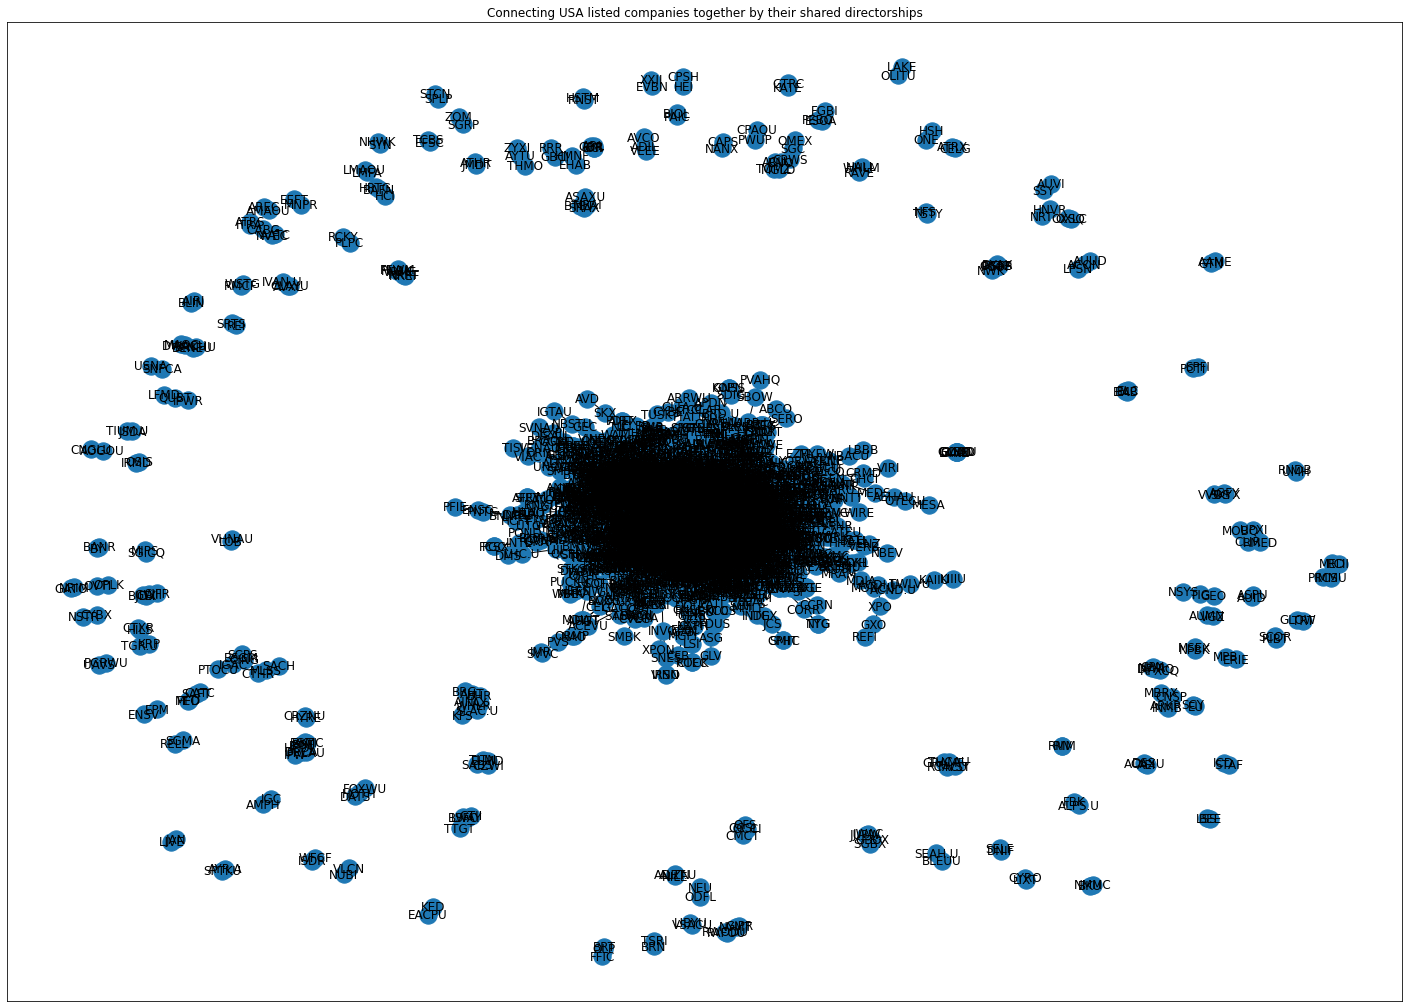

In [16]:
%%time
fig, ax = matplotlib.pyplot.subplots(figsize=(25,18))
networkx.draw_networkx(company_display_graph, ax=ax)
ax.set_title("Connecting USA listed companies together by their shared directorships")

In [17]:
largest_company_graph_component = None
largest_company_graph_component_size = 0
for component in networkx.connected_components(company_graph):
    if len(component) > largest_company_graph_component_size:
        largest_company_graph_component = component
        largest_company_graph_component_size = len(component)

In [18]:
for i,component in enumerate(networkx.connected_components(company_graph)):
    if len(component) == largest_company_graph_component_size:
        continue
    cursor.execute("""
select distinct board_name 
  from listed_company_details where company_id in %s""", [tuple(component)])
    print(f"Island #{i}... {len(component)} companies, Company names: {[row[0] for row in cursor]}")

Island #1... 4 companies, Company names: ['ACME UNITED CORP', 'MARYGOLD COMPANIES INC (THE)', 'TOMI ENVIRONMENTAL SOLUTIONS INC', 'UNITED STATES BRENT OIL FUND LP']
Island #2... 2 companies, Company names: ['ADPT CORP (Adaptec Inc prior to 06/2010) (De-listed 08/2010)', 'SUN MICROSYSTEMS INC (De-listed 01/2010)']
Island #3... 4 companies, Company names: ['AMERICAN REALTY INVESTORS INC', 'INCOME OPPORTUNITY REALTY INVESTORS INC', 'NEW CONCEPT ENERGY INC (Cabeltel International Corp prior to 05/2008)', 'TRANSCONTINENTAL REALTY INVESTORS INC']
Island #4... 2 companies, Company names: ['JANONE INC (Appliance Recycling Centers of America Inc prior to 09/2019)', 'LIVE VENTURES INC (LiveDeal Inc prior to 10/2015)']
Island #5... 2 companies, Company names: ['ARK RESTAURANTS CORP', 'INMUNE BIO INC']
Island #6... 2 companies, Company names: ['ATLANTIC AMERICAN CORP', 'GRAY TELEVISION INC (Gray Communications Systems prior to 07/2002)']
Island #7... 2 companies, Company names: ['ATRIX LABORATORIE

In [19]:
core_company_graph = networkx.subgraph(company_graph, largest_company_graph_component)
len(core_company_graph)

4020

In [20]:
networkx.density(core_company_graph)

0.0013313625948386952

In [21]:
networkx.average_clustering(core_company_graph)

0.22157927862786078

networkx.average_shortest_path_length(core_company_graph)

In [23]:
cursor.execute("select company_id, board_name from listed_company_details")
company_name_lookup = { row[0]: row[1] for row in cursor }

In [24]:
company_centrality = pandas.DataFrame({
    'eigenvector': pandas.Series(networkx.eigenvector_centrality(core_company_graph))
})
company_centrality['company_name'] = company_centrality.index.map(company_name_lookup.get)
company_centrality.sort_values('eigenvector', ascending=False)

,eigenvector,company_name
27786,2.466499e-01,SHERWIN-WILLIAMS CO
8304,2.374604e-01,CROWN CASTLE INC (Crown Castle International C...
1023651,2.342868e-01,NUVEEN INSURED NEW YORK AMT-FREE MUNICIPAL FUN...
22791,2.342868e-01,NUVEEN SELECT MATURITIES MUNICIPAL FUND
22797,2.342868e-01,NUVEEN VIRGINIA QUALITY MUNICIPAL INCOME FUND ...
...,...,...
24077,3.675960e-11,PENN VIRGINIA CORP (De-listed 01/2016)
2896707,3.325923e-11,MESA AIR GROUP INC
3343935,1.286096e-11,VENUS ACQUISITION CORP
3484658,7.559009e-12,CHICAGO ATLANTIC REAL ESTATE FINANCE INC
